In [22]:
import os 
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cf

from matplotlib.backends.backend_pdf import PdfPages

#### Load Correlantion and RMSE data

In [23]:
epoch = 169
split = 'test'  # 'train', 'val', 'test'
model = 'Full_Images_200_epochs'


#path_metrics = os.path.join(os.getcwd(), '..', 'output', 'metrics', 'valid')
path_metrics = os.path.join(os.getcwd(), '..', 'AirPollution_Run', model, 'output', 'metrics', 'valid')


print('Loading input data')
ds_time = xr.open_dataset(os.path.join(path_metrics, f'metric_time_maps_{epoch:04d}.nc'))
ds_space = xr.open_dataset(os.path.join(path_metrics, f'metric_space_maps_{epoch:04d}.nc'))

ds_space = ds_space.sortby('time')

Loading input data


In [24]:
ds_time

<xarray.Dataset>
Dimensions:              (latitude: 420, longitude: 700)
Coordinates:
    level                float32 ...
  * latitude             (latitude) float32 71.95 71.85 71.75 ... 30.15 30.05
  * longitude            (longitude) float32 -24.95 -24.85 ... 44.85 44.95
Data variables:
    Bias_map_time_pm2p5  (latitude, longitude) float32 ...
    Corr_map_time_pm2p5  (latitude, longitude) float32 ...
    RMSE_map_time_pm2p5  (latitude, longitude) float32 ...

In [25]:
modes = ['time', 'space']
for mode in modes:
    opt_metrics = [f'Bias_map_{mode}_pm2p5', f'Corr_map_{mode}_pm2p5', f'RMSE_map_{mode}_pm2p5']
    metric = opt_metrics[2]

    if mode == 'time':
        metric_time = ds_time[metric]
    else:
        metric_space = ds_space[metric]

In [26]:
metric_time

<xarray.DataArray 'RMSE_map_time_pm2p5' (latitude: 420, longitude: 700)>
[294000 values with dtype=float32]
Coordinates:
    level      float32 ...
  * latitude   (latitude) float32 71.95 71.85 71.75 71.65 ... 30.25 30.15 30.05
  * longitude  (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95

In [27]:
metric_space

<xarray.DataArray 'RMSE_map_space_pm2p5' (time: 130)>
[130 values with dtype=float32]
Coordinates:
    level    float32 ...
  * time     (time) datetime64[ns] 2023-01-03 2023-01-08 ... 2025-05-18

#### Open the PDF file

In [28]:
path_out = os.path.join(os.getcwd())
print(path_out)

/home/cide/Documents/5.-Downscaling/downscaling-SwinFSD/Test


In [29]:
pdf = PdfPages(os.path.join(path_out, f'Metrics_maps_{metric}.pdf'))

#### Calcule basics statistics over the metrics

In [30]:
print('Shape:')
print()
print('Metrics time: ', metric_time.shape)
#print('Metrics time spain: ', metric_time_spain.shape)
print()
print('SPACE:')
print('Metric space: ', metric_space.shape)
#print('Metric space spain: ', metric_space_spain.shape)

Shape:

Metrics time:  (420, 700)

SPACE:
Metric space:  (130,)


In [31]:
print('MIN:')
print()
print('Metrics time: ', np.round(metric_time.min().item(), 4))
#print('Metrics time spain: ', np.round(metric_time_spain.min().item(), 4))
print()
print('SPACE:')
print('Metric space: ', np.round(metric_space.min().item(), 4))
#print('Metric space spain: ', np.round(metric_space_spain.min().item(), 4))

MIN:

Metrics time:  0.386

SPACE:
Metric space:  1.1176


In [32]:
print('MIN:')
print()
print('Metrics time: ', np.round(metric_time.max().item(), 4))
#print('Metrics time spain: ', np.round(metric_time_spain.max().item(), 4))
print()
print('SPACE:')
print('Metric space: ', np.round(metric_space.max().item(), 4))
#print('Metric space spain: ', np.round(metric_space_spain.max().item(), 4))

MIN:

Metrics time:  30.2975

SPACE:
Metric space:  7.6495


In [33]:
print('MEAN:')
print()
print('Metrics time: ', np.round(metric_time.mean().item(), 4))
#print('Metrics time spain: ', np.round(metric_time_spain.mean().item(), 4))
print()
print('SPACE:')
print('Metric space: ', np.round(metric_space.mean().item(), 4))
#print('Metric space spain: ', np.round(metric_space_spain.mean().item(), 4))

MEAN:

Metrics time:  1.7761

SPACE:
Metric space:  2.0981


In [34]:
print('STD:')
print()
print('Metrics time: ', np.round(metric_time.std().item(), 4))
#print('Metrics time spain: ', np.round(metric_time_spain.std().item(), 4))
print()
print('SPACE:')
print('Metric space: ', np.round(metric_space.std().item(), 4))
#print('Metric space spain: ', np.round(metric_space_spain.std().item(), 4))

STD:

Metrics time:  1.4233

SPACE:
Metric space:  0.8823


In [35]:
def plot_comparison_time(data1, data2, metric, split, save_as):

    mean_data1 = np.round(data1.mean(skipna=True), 4)
    std_data1 = np.round(data1.std(skipna=True), 4)
    mean_data2 = np.round(data2.mean(skipna=True), 4)
    std_data2 = np.round(data2.std(skipna=True), 4)

    print('Metrics: ', mean_data1.values, ' +- ', std_data1.values)
    print('Metrics_spain: ', mean_data2.values, ' +- ', std_data2.values)
    
    plt.style.use('default')
        
    #cmap = 'jet'
    cmap = 'viridis'

    #central_lon, central_lat = 11, 48
    #extent = [-10.3, 5, 31, 46.4]
    extent = [data1.longitude.min(), data1.longitude.max(), data1.latitude.min(), data1.latitude.max()]

    fig, axs = plt.subplots(nrows=1,ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,6))

    axs=axs.flatten()

    for i in range(2):
        #ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))

        axs[i].set_extent(extent)
        #axs[i].gridlines(alpha=0.8)
        gls = axs[i].gridlines(alpha=0.5, draw_labels=True, dms=True)
        gls.right_labels = False
        gls.top_labels = False
        axs[i].coastlines(resolution='10m')
    
    vmin, vmax = data1.min(), data1.max()
    #vmin, vmax = 0.5, 1
    #im0 = axs[0].imshow(data1.isel(time=time), cmap=cmap, interpolation='lanczos', vmin=vmin, vmax=vmax, extent=extent, transform=ccrs.PlateCarree())
    im0 = axs[0].pcolormesh(data1.longitude, data1.latitude, data1.values, cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    cbar0 = plt.colorbar(im0,ax=axs[0],fraction=0.046, pad=0.04)
    cbar0.set_label(label=f'{metric}',size=14, labelpad=10)
    axs[0].set_title(f'{metric}_{split}')
    
    if vmin==vmax:
        cbar0.set_ticks([0])
    
    #vmin, vmax = 0, 5
    vmin, vmax = -5, 5#data2.min(), data2.max()
    #im1 = axs[1].imshow(data2.isel(time=time), cmap=cmap, interpolation='lanczos', vmin=vmin, vmax=vmax, extent=extent, transform=ccrs.PlateCarree())
    im1 = axs[1].pcolormesh(data2.longitude, data2.latitude, data2.values, cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    cbar1 = plt.colorbar(im1,ax=axs[1],fraction=0.046, pad=0.04)
    cbar1.set_label(label=f'{metric}',size=14, labelpad=10)
    axs[1].set_title(f'{metric}_spain_{split}')

    if vmin==vmax:
        cbar1.set_ticks([1])

    pdf.savefig()
        
    if save_as!=None: 
        plt.savefig(save_as)
    
    plt.show()
    plt.close()
    return

In [36]:
def plot_comparison_space(data1, data2, metric, split, save_as):
    plt.style.use('default')
        
    fig, axs = plt.subplots(2, figsize=(16,12))

    #axs=axs.flatten()
    
    #vmin, vmax = data1.min(), data1.max()
    #vmin, vmax = 0.5, 1

    mean_data1 = np.round(data1.mean(skipna=True), 4)
    std_data1 = np.round(data1.std(skipna=True), 4)
    mean_data2 = np.round(data2.mean(skipna=True), 4)
    std_data2 = np.round(data2.std(skipna=True), 4)

    print(mean_data1.values, ' +- ', std_data1.values)
    print(mean_data2.values, ' +- ', std_data2.values)

    axs[0].plot(data1.time, data1.values)
    axs[0].axhline(y=mean_data1, color='r', linestyle='--', label='Mean')
    axs[0].set_title(label=f'{metric}_{split}', size=14)
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel(f'{metric}')
    
    axs[1].plot(data2.time, data2.values)
    axs[1].axhline(y=mean_data2, color='r', linestyle='--', label='Mean')
    axs[1].set_title(label=f'{metric}_spain_{split}', size=14)
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel(f'{metric}')

    pdf.savefig()

    if save_as!=None: 
        plt.savefig(save_as)
    
    plt.show()
    plt.close()
    return

Metrics:  1.7761  +-  1.4233
Metrics_spain:  1.7761  +-  1.4233


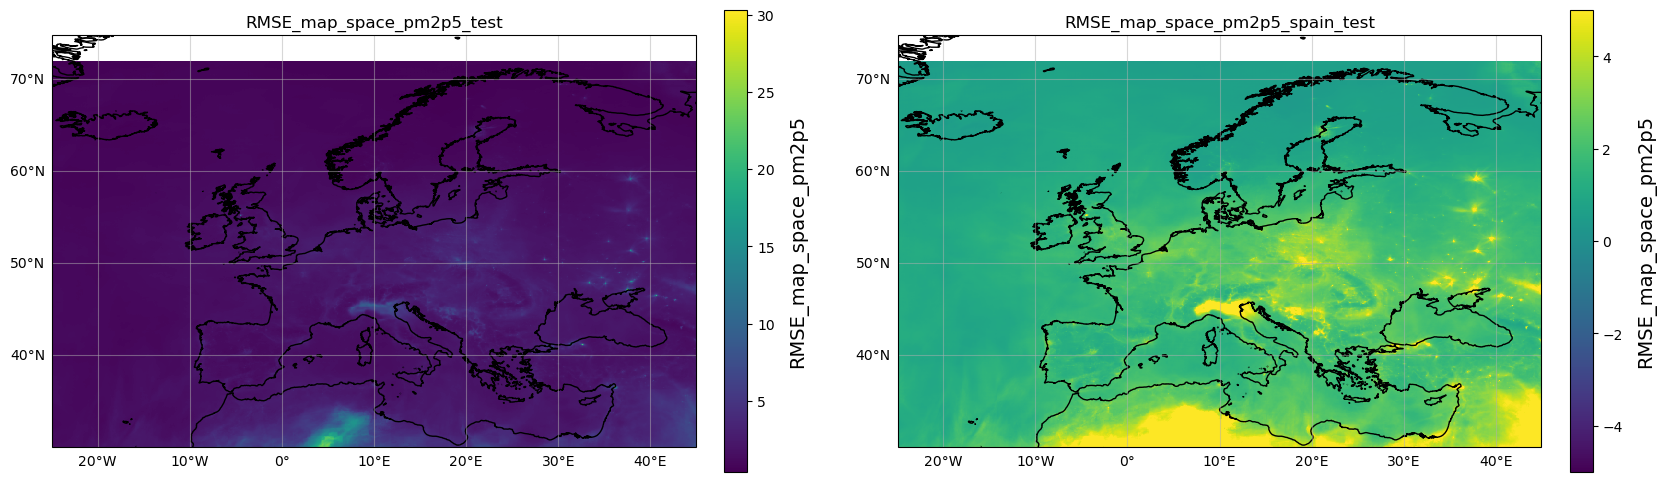

In [37]:
if split == 'test':
    plot_comparison_time(data1=metric_time, data2=metric_time, metric=metric, split=split, save_as=None)
else:
    plot_comparison_time(data1=metric_time.sel(epoch=epoch), data2=metric_time_spain.sel(epoch=epoch), metric=metric, split=split, save_as=None)

2.0981  +-  0.8823
2.0981  +-  0.8823


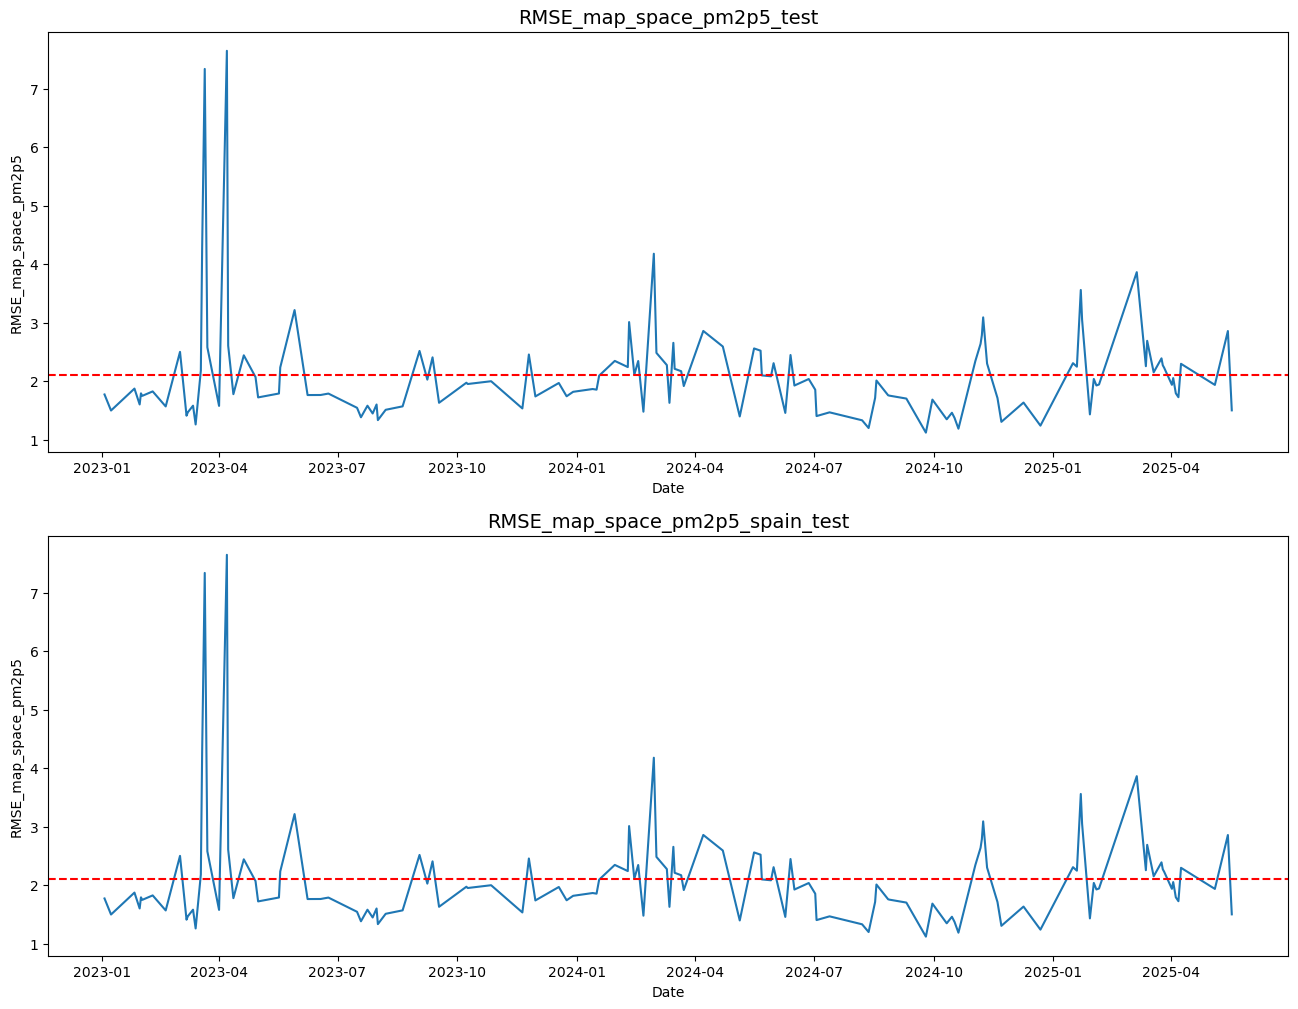

In [38]:
if split == 'test':
    plot_comparison_space(data1=metric_space, data2=metric_space, metric=metric, split=split, save_as=None)
else:
    plot_comparison_space(data1=metric_space.sel(epoch=epoch), data2=metric_space_spain.sel(epoch=epoch), metric=metric, split=split, save_as=None)

In [39]:
metrics_time_mean = []
metrics_time_spain_mean = []
metrics_space_mean = []
metrics_space_spain_mean = []

for i in range(metric_time.shape[0]):

    metrics_time_mean.append(metric_time.isel(epoch=i).mean().item())
    metrics_time_spain_mean.append(metric_time_spain.isel(epoch=i).mean().item())
    metrics_space_mean.append(metric_space.isel(epoch=i).mean().item())
    metrics_space_spain_mean.append(metric_space_spain.isel(epoch=i).mean().item())


metrics_time_mean = np.array(metrics_time_mean)
metrics_time_spain_mean = np.array(metrics_time_spain_mean)
metrics_space_mean = np.array(metrics_space_mean)
metrics_space_spain_mean = np.array(metrics_space_spain_mean)

ValueError: Dimensions {'epoch'} do not exist. Expected one or more of ('latitude', 'longitude')

In [24]:
def plot_comparison_space_epochs(data1, data1_spain, data2, data2_spain, metric, split, epochs):

    plt.style.use('default')
        
    fig, axs = plt.subplots(4, figsize=(16,16))

    fig.subplots_adjust(hspace=0.4)

    axs[0].plot(epochs, data1, linestyle='-', color='blue')
    axs[0].set_title(label=f'{metric}_time_{split}',size=14)
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel(f'{metric}')
    axs[0].legend()

    axs[1].plot(epochs, data1_spain, linestyle='-', color='red')
    axs[1].set_title(label=f'{metric}_time_spain_{split}',size=14)
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel(f'{metric}')
    axs[1].legend()

    axs[2].plot(epochs, data2, linestyle='-', color='blue')
    axs[2].set_title(label=f'{metric}_space_{split}',size=14)
    axs[2].set_xlabel('Epochs')
    axs[2].set_ylabel(f'{metric}')
    axs[2].legend()

    axs[3].plot(epochs, data2_spain, linestyle='-', color='red')
    axs[3].set_title(label=f'{metric}_space_spain_{split}',size=14)
    axs[3].set_xlabel('Epochs')
    axs[3].set_ylabel(f'{metric}')
    axs[3].legend()

    pdf.savefig()
    
    plt.show()

    return

In [ ]:
plot_comparison_space_epochs(metrics_time_mean, metrics_time_spain_mean, metrics_space_mean, metrics_space_spain_mean, metric, split, metric_time.epoch)

In [26]:
pdf.close()